# 최적화
### 이번 장은 이전에 사용했던 모델을 발전시키고 예측을 강화할 방법을 탐구하는 과정을 다룰 것입니다.
### 이전 예측에서 충분한 결과를 얻었다면 건너뛰어도 좋습니다.

## 목차
1. 데이터 준비
1. 이전 모델 분석
1. 개선점 파악
1. 개선 방법

## 1. 데이터 불러오기

먼저 fbprophet 학습을 위해 필요한 라이브러리와 데이터를 불러옵니다.
앞서와 같은 장비 번호의 데이터를 불러옵니다.

#### (실습 1) 학습에 사용할 데이터를 불러옵니다. 라이브러리도 같이 불러옵니다.

In [17]:
from aicentro.session import Session
from aicentro.framework.keras import Keras as AiduFrm
import numpy as np
import pandas as pd
aidu_session = Session(verify=False)
aidu_framework = AiduFrm(session=aidu_session)
data = pd.read_csv("data_2.csv")

#### (실습 2) fbprophet을 위해 데이터를 정리합니다. 구분을 위해 train_fb, test_fb로 저장해주세요

In [18]:
# Hint : 앞서 진행했던 내용을 참고하시면 됩니다. 특히 칼럼명을 변형하는 과정까지 진행해야 함을 기억하세요.
from fbprophet import Prophet
import datetime
data_dropped = data.drop('dev', axis='columns')
data_dropped['date'] = pd.to_datetime(data_dropped['date'],format='%Y%m%d')
data_dropped = data_dropped.set_index('date')
train_fb = data_dropped.loc[:datetime.datetime(2019,10,31),:]
test_fb = data_dropped.loc[datetime.datetime(2019,11,1):,:]

train_fb = train_fb.reset_index().rename(columns={'val':'y'})
train_fb['ds'] = pd.to_datetime(train_fb['date'].astype(str))
train_fb = train_fb.drop('date',axis=1)

test_fb = test_fb.reset_index().rename(columns={'val':'y'})
test_fb['ds'] = pd.to_datetime(test_fb['date'].astype(str))
test_fb = test_fb.drop('date',axis=1)

Importing plotly failed. Interactive plots will not work.


다음은 ARIMA 모델을 위한 데이터를 불러옵니다.

#### (실습 3) ARIMA 모델을 위해 데이터를 정리합니다. 구분을 위해 train_arima, test_arima로 저장해주세요

In [4]:
# Hint : 앞서 진행했던 내용을 참고하시면 됩니다.
from statsmodels.tsa.arima_model import ARIMA
import datetime
data_dropped = data.drop('dev', axis='columns')
data_dropped['date'] = pd.to_datetime(data_dropped['date'],format='%Y%m%d')
data_dropped = data_dropped.set_index('date')
train_arima = data_dropped.loc[:datetime.datetime(2019,10,31),:]
test_arima = data_dropped.loc[datetime.datetime(2019,11,1):,:]

## 2. 이전 모델 분석

이전에 학습했던 모델들의 문제점에 대해 생각해봅시다.  
우선 데이터가 부족했다면 데이터를 추가할 수 있을 것입니다.  
어쩌면 모델을 생성할 때 입력한 모수가 적절하지 못했을 수도 있습니다.  
혹은 데이터가 적절치 못했을 수도 있고 전처리 과정에서 무언가 추가해야 할 수도 있습니다.

#### (실습 4) 이전 모델에서 부족했던 점을 찾아봅니다.

<pre>
# Hint : 각 모델의 평가를 참조하면 좋습니다.
fbprophet에서 다른 설정값을 주면 어떨까요?
arima 모델의 모수를 맞춰서 넣으면 어떨까요?
</pre>

## 3. 개선점 파악
이전 모델의 문제점을 파악했다면 개선하기 위한 방법을 생각해봅시다.  
데이터를 추가하는 방법엔 이전 데이터를 바탕으로 가짜 데이터를 추가하는 방법도 고려할 수 있습니다.  
혹은 모수를 선택하기 위한 다른 방법을 찾아볼 수 있을 겁니다.  
전처리 과정을 간략하게 하거나 보다 좋은 데이터를 얻기 위해 취할 수 있는 방법이 있을 수도 있습니다.

## 4. 개선 방법
이제 개선하기 위한 방법을 찾아봅시다.  
다양한 모수를 입력해보거나 데이터 전처리를 다양한 방법으로 바꿀 수 있습니다.  
예를 들면 일 단위 데이터를 1시간 단위 데이터로 바꾸는 방법도 생각해 볼 수 있습니다.  
처음 모델을 학습 시켰을 때 원하는 결과가 나오지 않을 수 있습니다.  
또는 보다 좋은 모델이 있을 수도 있습니다.  
이후엔 모델의 학습 속도, 예측 속도를 고려할 수도 있습니다.

#### (실습 5) 여러분의 fbprophet 모델을 개선해봅시다. 두 가지 이상 새로운 모델을 만들어보세요.

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


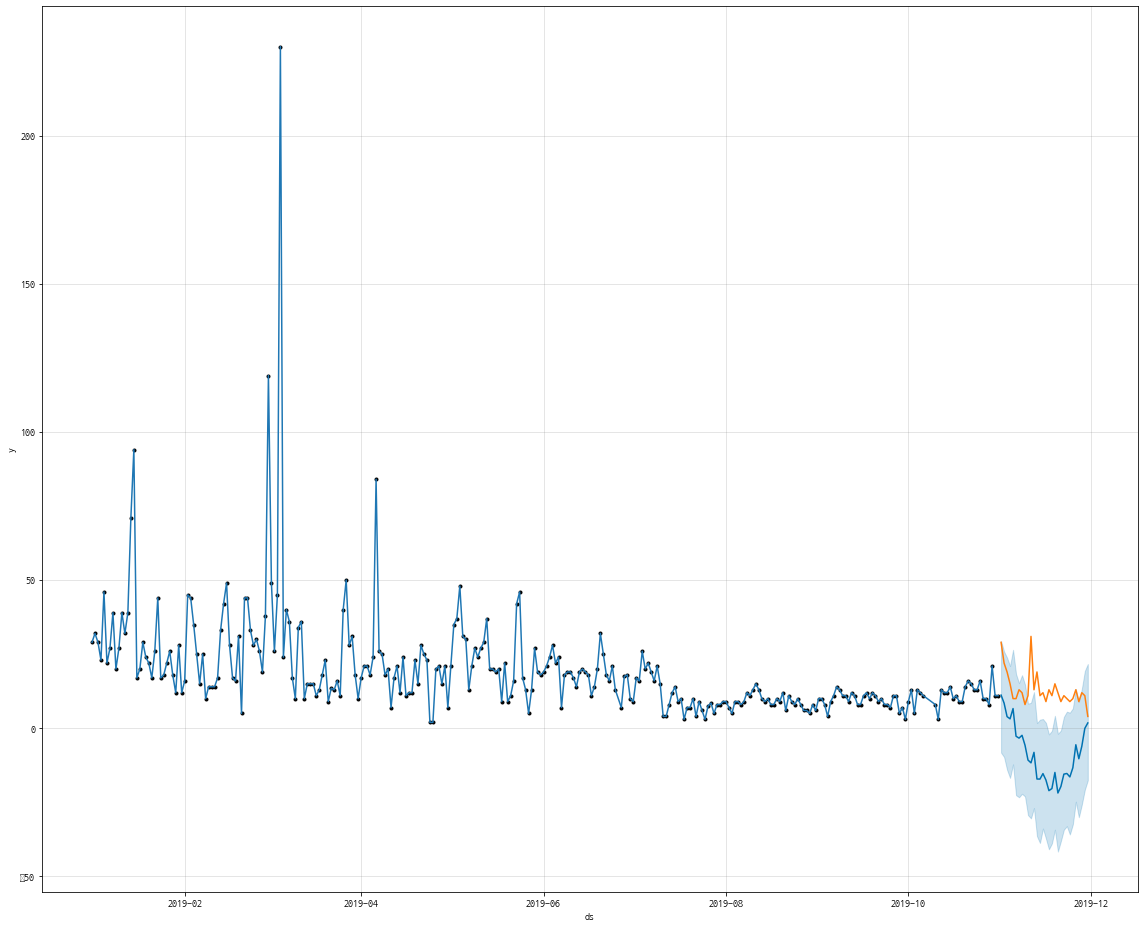

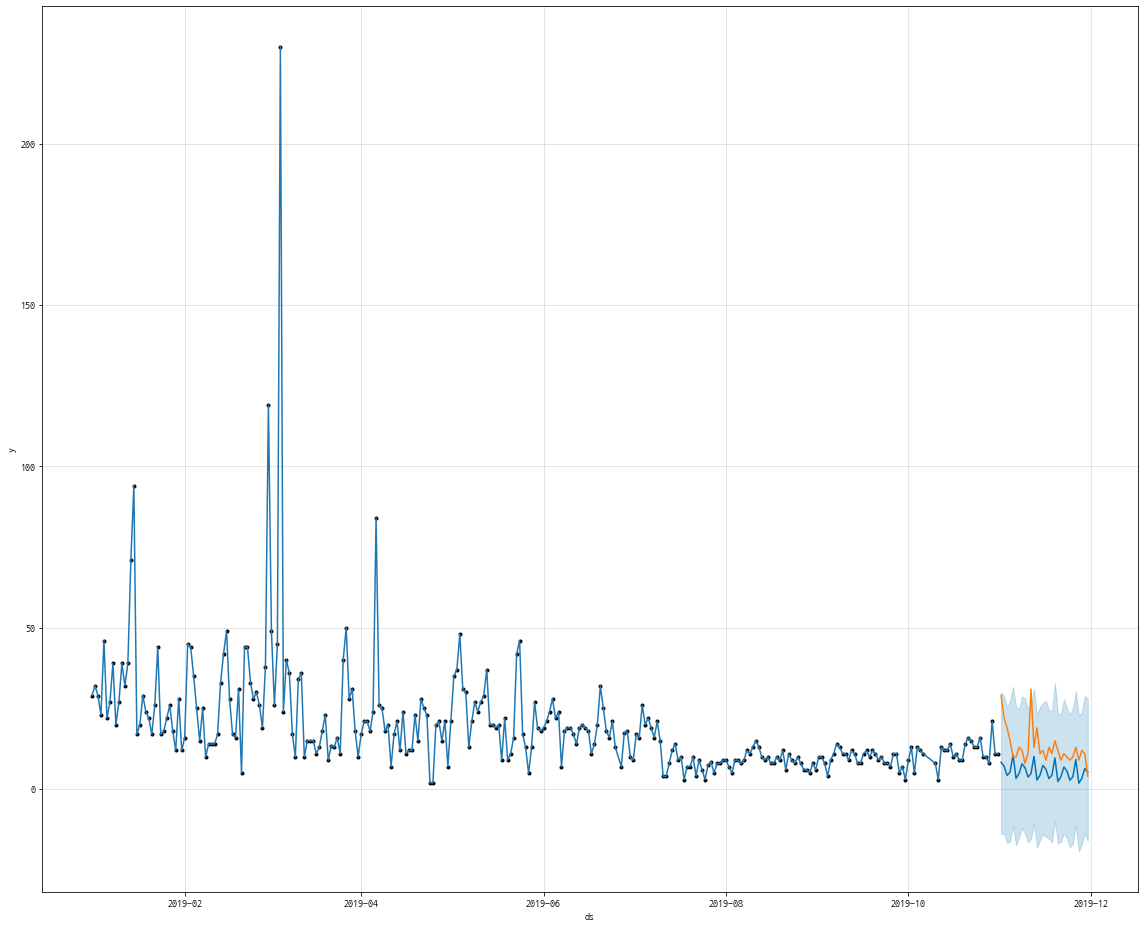

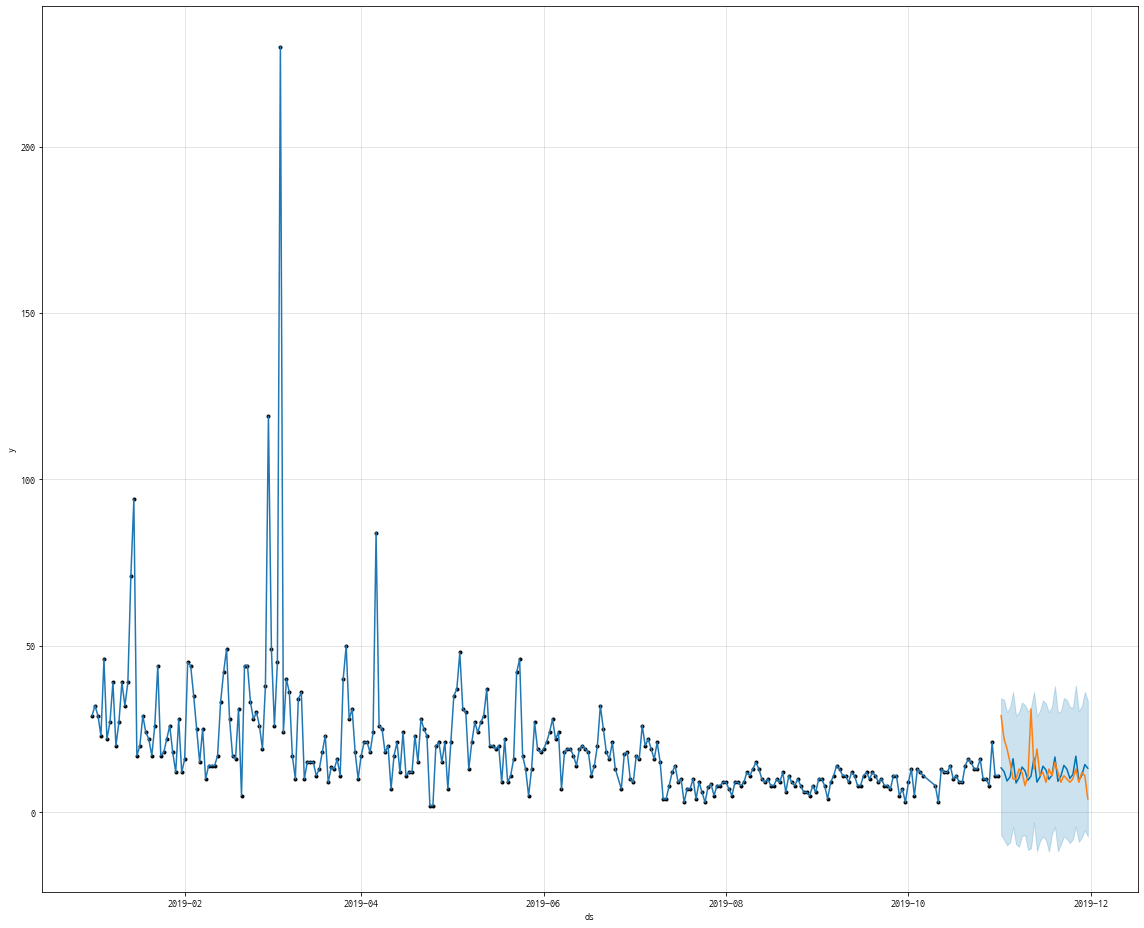

In [19]:
# fbprophet

## 트렌드가 변화하는 지점을 더 잘 찾기 위한 특성
## range 기본 값은 0.8, scale 기본은 0.05
model_1 = Prophet(yearly_seasonality=True, changepoint_range=0.9, changepoint_prior_scale=0.1)
model_1.fit(train_fb)

forecast_fb_1 = model_1.predict(test_fb)

import matplotlib.pyplot as plt
%matplotlib inline
fig,ax=plt.subplots(figsize=(16,13))
model_1.plot(forecast_fb_1, ax=ax)
plt.plot(train_fb['ds'],train_fb['y'])
plt.plot(test_fb['ds'],test_fb['y'])

## 특성이 없는 모델
model_2 = Prophet()
model_2.fit(train_fb)
forecast_fb_2 = model_2.predict(test_fb)
fig,ax=plt.subplots(figsize=(16,13))
model_2.plot(forecast_fb_2, ax=ax)
plt.plot(train_fb['ds'],train_fb['y'])
plt.plot(test_fb['ds'],test_fb['y'])

## 특성이 더 강한 모델
model_3 = Prophet(changepoint_prior_scale=0.5)
model_3.fit(train_fb)
forecast_fb_3 = model_3.predict(test_fb)
fig,ax=plt.subplots(figsize=(16,13))
model_3.plot(forecast_fb_3, ax=ax)
plt.plot(train_fb['ds'],train_fb['y'])
plt.plot(test_fb['ds'],test_fb['y'])

다음은 ARIMA 모델에서 ACF와 PACF를 구하는 방법을 알려드리겠습니다.  
statsmodels에 있는 함수를 사용하면 그래프를 그릴 수 있습니다.

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


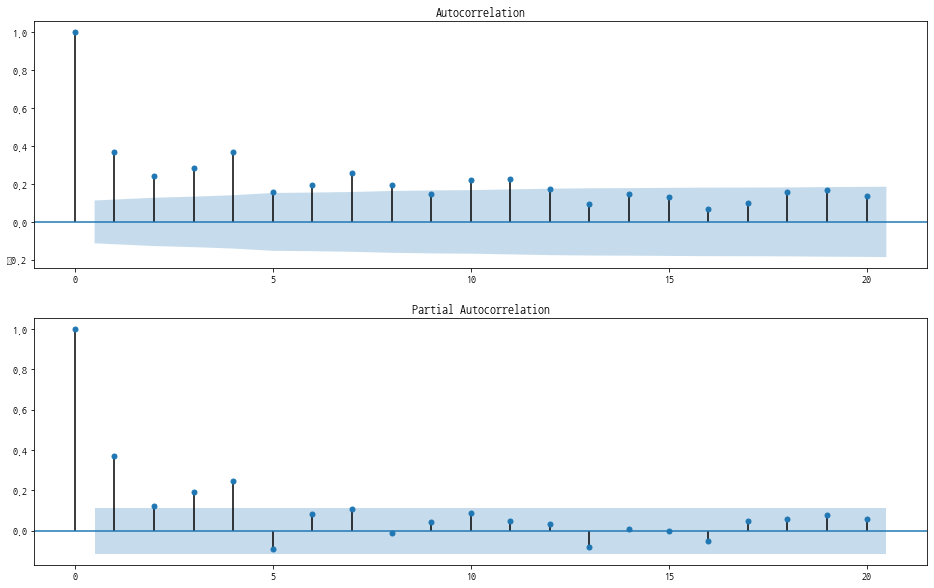

In [6]:
# ARIMA 모델
## ACF와 PACF 계산

import matplotlib.pyplot as plt
import statsmodels.api as sm
fig = plt.figure(figsize=(16,10))
# 그래프의 위치 설정
ax1=fig.add_subplot(211)
# ACF 그래프
fig = sm.graphics.tsa.plot_acf(train_arima['val'], lags=20, ax=ax1)
# 그래프의 위치 설정
ax2 = fig.add_subplot(212)
# PCAF 그래프
fig = sm.graphics.tsa.plot_pacf(train_arima['val'], lags=20,ax=ax2)

모수를 결정하는 기준은 아래와 같습니다.  

|Models|ACF|PACF|
|------|---------------|------------|
|AR(P)|점차 0에 접근|시차 P이후 0|
|MA(Q)|시차 Q 이후 0|점차 0에 접근|
|ARIMA(P,Q)|시차 Q이후 0|시차 P이후 0|

특히 위와 같이 ACF가 0으로 접근하지 않으면 차분을 하면 됩니다.  
차분을 진행하는 법은 아래와 같습니다.

In [7]:
import copy as cp
differed = cp.deepcopy(train_arima)
differed = differed.diff().dropna()


차분의 결과에서 ACF와 PACF를 구해본 후 적절한 차분 횟수와 모수를 정할 수 있습니다.  
위의 그래프는 차분하지 않은 데이터이므로 D=0을 사용하면 됩니다.  
ACF가 잘 줄어드지 않는 것 같으니 차분을 해볼까요?

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


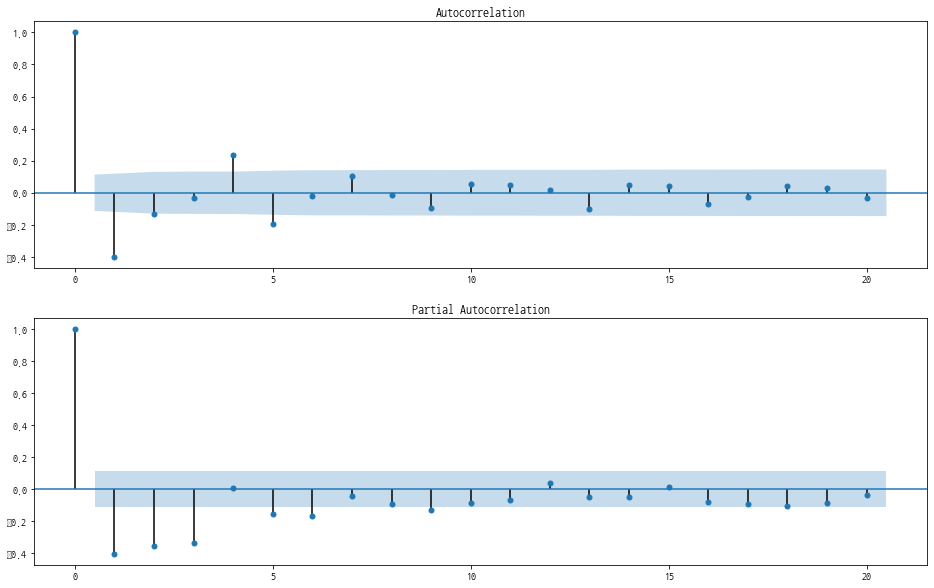

In [8]:

fig = plt.figure(figsize=(16,10))
# 그래프의 위치 설정
ax1=fig.add_subplot(211)
# ACF 그래프
fig = sm.graphics.tsa.plot_acf(differed['val'], lags=20, ax=ax1)
# 그래프의 위치 설정
ax2 = fig.add_subplot(212)
# PCAF 그래프
fig = sm.graphics.tsa.plot_pacf(differed['val'], lags=20,ax=ax2)

이번엔 위의 그래프에서 파란 값 범위 안에 근접하기 시작하는 P=4, Q=2을 선택하겠습니다.  
그리고 차분을 한 번 했으니 D=1로 하겠습니다.

In [14]:
p = 4
d = 1
q = 2

이제 이 값을 모수로 모델을 생성할 수 있습니다.  
다른 모수를 기준으로 모델을 생성해보며 결과가 어떻게 바뀌는지 확인하세요.

#### (실습 6) 여러분의 ARIMA 모델을 개선해보세요. 두 가지 이상 다른 설정을 추가해보세요.

In [ ]:
# warning 에러 무시
import warnings
warnings.filterwarnings("ignore")

In [10]:
# Hint : ARIMA 모델의 모수를 다르게 설정해보세요.
model_arima = ARIMA(train_arima,(p,d,q))
model_fit = model_arima.fit(trend='nc')

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency informa

In [12]:
full_forecast = model_fit.forecast(steps=test_arima.shape[0])
forecast_arima = pd.DataFrame(full_forecast[0], index=test_arima.index, columns = test_arima.columns)

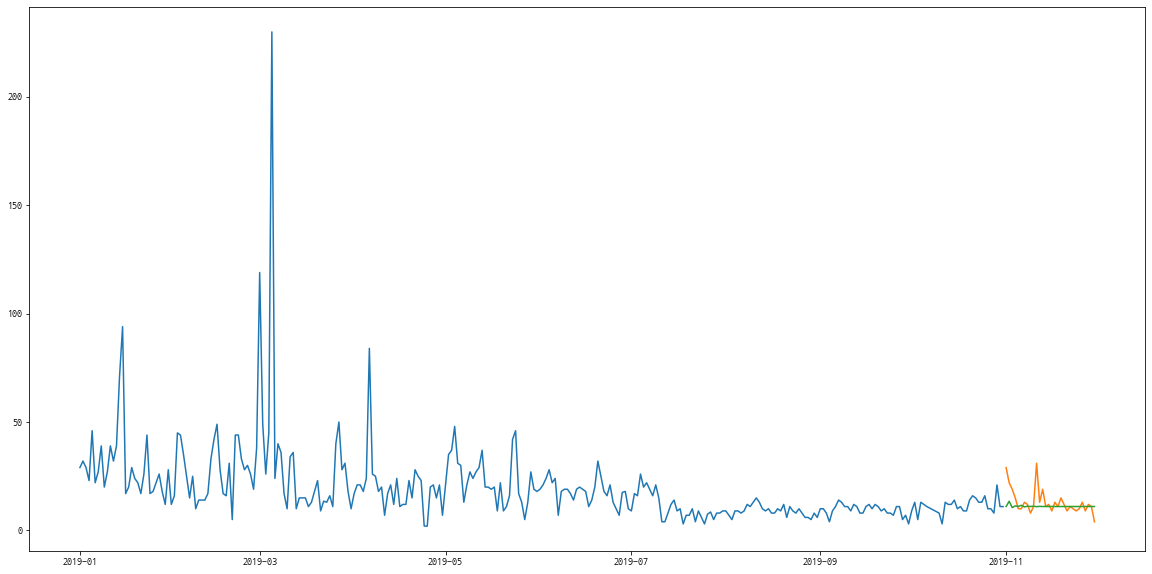

In [13]:

plt.figure(figsize=(20,10))
plt.plot(train_arima)
plt.plot(test_arima)
plt.plot(forecast_arima)

/usr/local/lib/python3.6/dist-packages/statsmodels/regression/linear_model.py:1434: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


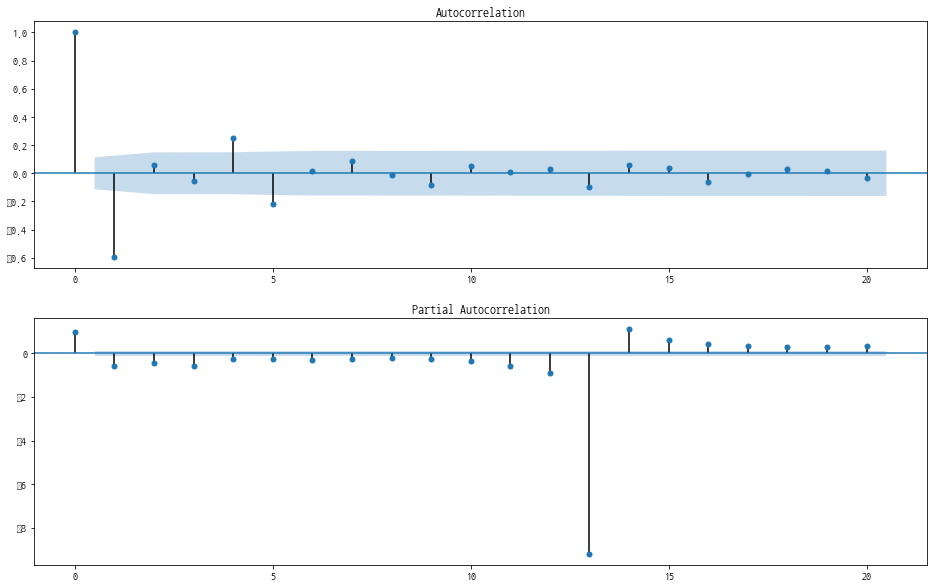

In [53]:
differed = differed.diff().dropna()

fig = plt.figure(figsize=(16,10))
# 그래프의 위치 설정
ax1=fig.add_subplot(211)
# ACF 그래프
fig = sm.graphics.tsa.plot_acf(differed['val'], lags=20, ax=ax1)
# 그래프의 위치 설정
ax2 = fig.add_subplot(212)
# PCAF 그래프
fig = sm.graphics.tsa.plot_pacf(differed['val'], lags=20,ax=ax2)

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                              ARMA Model Results                              
Dep. Variable:                    val   No. Observations:                  300
Model:                     ARMA(3, 3)   Log Likelihood               -1257.362
Method:                       css-mle   S.D. of innovations             15.923
Date:                Wed, 27 Oct 2021   AIC                           2528.725
Time:                        00:29:07   BIC                           2554.651
Sample:                             0   HQIC                          2539.100
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1.val     -0.0148      0.167     -0.089      0.929      -0.341       0.312
ar.L2.val      0.4227      0.147      2.878      0.004       0.135       0.711
ar.L3.val      0.5875      0.117      5.037      0.0

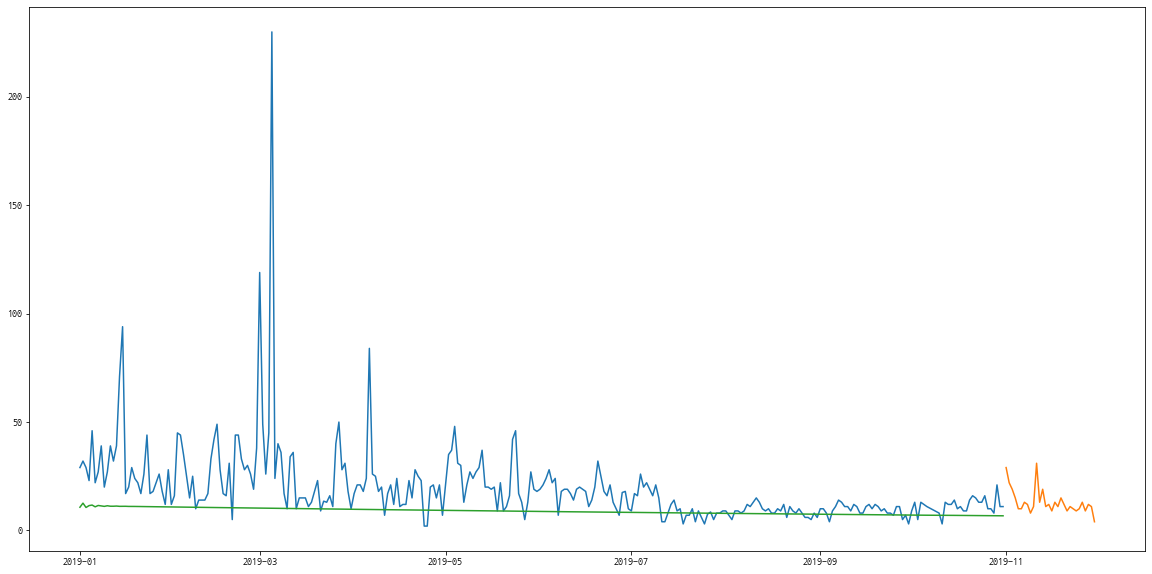

In [97]:
p = 3
d = 0
q = 3

model_new = ARIMA(train_arima,(p,d,q))
model_fit = model_new.fit(trend='nc')
print(model_fit.summary())
full_forecast = model_fit.forecast(steps=train_arima.shape[0])
forecast_arima = pd.DataFrame(full_forecast[0], index=train_arima.index, columns = test_arima.columns)
plt.figure(figsize=(20,10))
plt.plot(train_arima)
plt.plot(test_arima)
plt.plot(forecast_arima)

In [100]:
!pip install pmdarima

Looking in indexes: http://10.220.235.19/pypi/simple
     |████████████████████████████████| 1.5 MB 89.0 MB/s eta 0:00:01                         | 245 kB 89.0 MB/s eta 0:00:01
     |████████████████████████████████| 14.8 MB 44 kB/s eta 0:00:0101 eta 0:00:010:01
     |████████████████████████████████| 2.1 MB 79.6 MB/s eta 0:00:01
  Attempting uninstall: numpy
    Found existing installation: numpy 1.16.4
    Uninstalling numpy-1.16.4:
      Successfully uninstalled numpy-1.16.4
  Attempting uninstall: Cython
    Found existing installation: Cython 0.29.20
    Uninstalling Cython-0.29.20:
      Successfully uninstalled Cython-0.29.20
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.


In [101]:
import pmdarima as pm
pm.auto_arima(train_arima)

ARIMA(order=(1, 1, 1), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


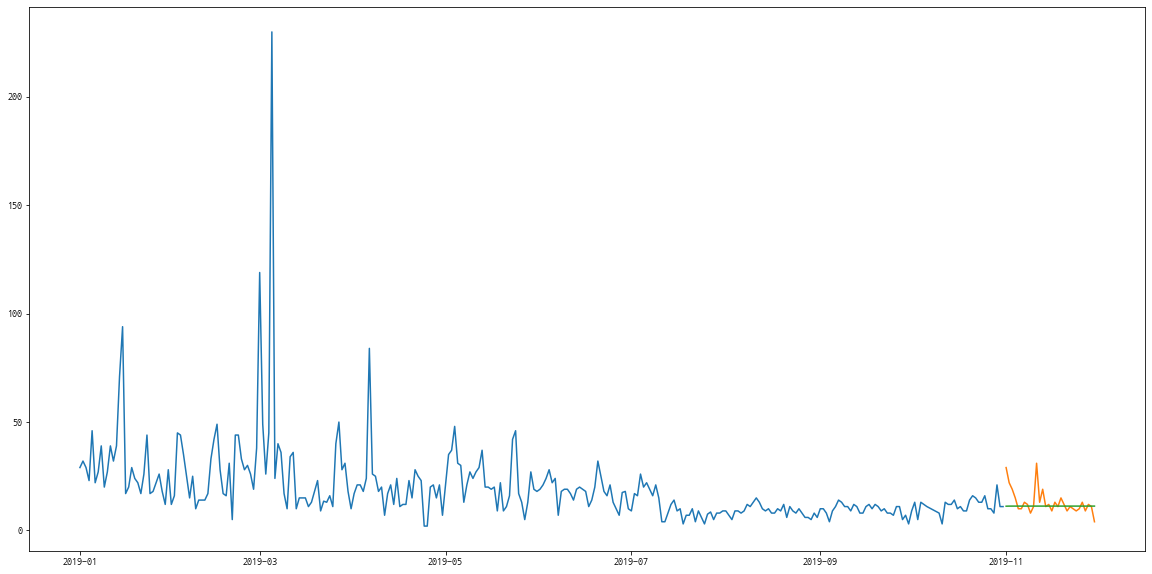

In [110]:
p = 1
d = 1
q = 1

model_new = ARIMA(train_arima,(p,d,q))
model_fit = model_new.fit(trend='nc')
full_forecast = model_fit.forecast(steps=test_arima.shape[0])
forecast_arima = pd.DataFrame(full_forecast[0], index=test_arima.index, columns = test_arima.columns)
plt.figure(figsize=(20,10))
plt.plot(train_arima)
plt.plot(test_arima)
plt.plot(forecast_arima)